# Fitting Saffman-Taylor instabilities to horizontal line roughness

Leanne Friedrich 12/6/21

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
import matplotlib.cm as cm
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## importing data

In [3]:
ss,u = me.importStillsSummary(diag=True)
seg, useg = me.importStillsSummary(file='segmentsSummary.csv', diag=False)
ss = ss.merge(seg[['folder', 'horiz_segments']], on='folder', suffixes=['', '_manual'], how='left')

Independents: ['folder', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['xs_aspect', 'xs_xshift', 'xs_yshift', 'xs_area', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'vert_wN', 'vert_hN', 'v

## analyzing data

Text(0.5, 0, '$Ca = \\eta_{sup}v_{ink}/\\sigma$')

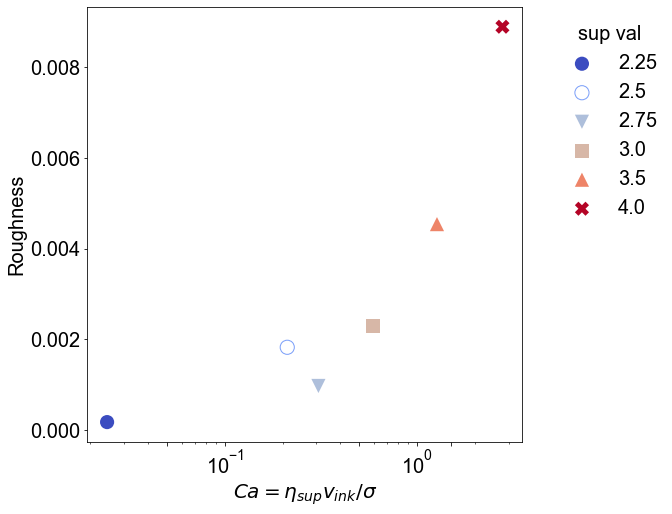

In [7]:
ss0 = ss.copy()
ss0 = ss0[(ss0.ink_val==8)&(ss0.ink_type=='mineral oil')]
fig,axs = mp.scatterSS(ss0, 'int_Ca', 'horiz_roughness', 'sup_val', dx=0, dy=0, logx=True, fontsize=20, figsize=(8,8), markersize=200)
axs.set_ylabel('Roughness')
axs.set_xlabel('$Ca = \eta_{sup}v_{ink}/\sigma$')

Text(0.5, 0, '$Ca = \\eta_{sup}v_{ink}/\\sigma$')

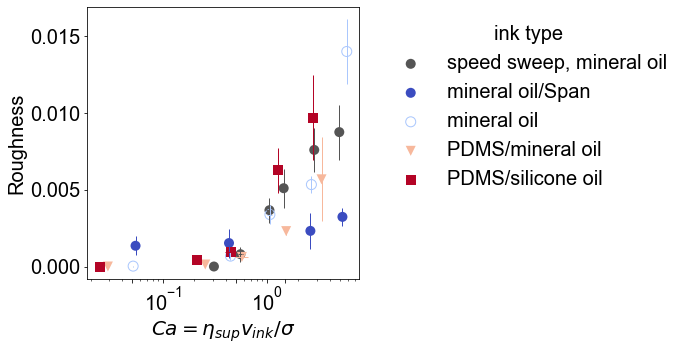

In [66]:
ss0 = ss.copy()
ss0 = ss0[ss0.horiz_roughness<0.05]
ss0 = ss0[ss0.horiz_roughness_SE<0.01]
ss0 = ss0[ss0.sigma>0]
ss0 = ss0.sort_values(by='sigma')
mp.simplifyType(ss0)
me.plainTypes(ss0)
fig,axs = mp.sweepTypeSS(ss0, 'int_Ca', 'horiz_roughness', logx=True, dx=0.2, fontsize=20, figsize=(5,5), markersize=100)
axs.set_ylabel('Roughness')
axs.set_xlabel('$Ca = \eta_{sup}v_{ink}/\sigma$')

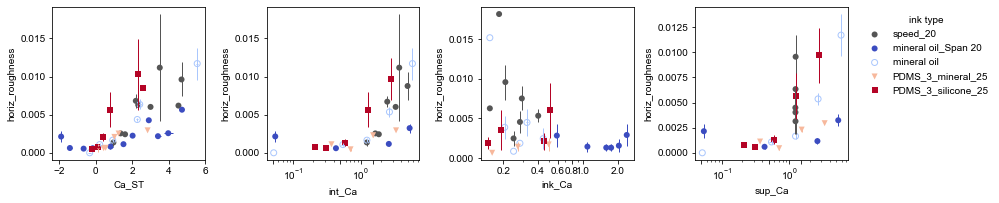

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [33]:
ss0 = ss.copy()
ss0 = ss0[ss0.sigma>0]
ss0 = ss0[ss0.horiz_segments_manual==3]
ss0['Ca_ST'] = (ss0['sup_visc0'] - ss0['ink_visc0'])*ss0['ink_v']/ss0['sigma']
ss0 = ss0[ss0.horiz_roughness_SE<0.005]
mp.simplifyType(ss0)
ss0.sort_values(by='sigma', inplace=True)
fig,axs = plt.subplots(1,4, figsize=(14,4))
for i,xvar in enumerate(['Ca_ST', 'int_Ca', 'ink_Ca', 'sup_Ca']):
    mp.sweepTypeSS(ss0, xvar, 'horiz_roughness', logx=(i>0), ax=axs[i], legend=(i==3), legendloc='right')
fig.tight_layout()

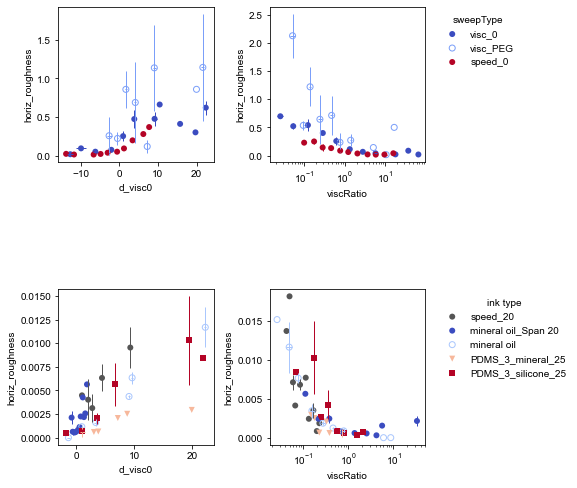

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [31]:
ss0 = ss.copy()
ss0['d_visc0'] = ss0['sup_visc0'] - ss0['ink_visc0']
ss0 = ss0[ss0.horiz_segments_manual==3]
mp.simplifyType(ss0)
ss0.sort_values(by='sigma', inplace=True)
sslap = ss0[ss0.sigma==0]
ssca = ss0[ss0.sigma>0]
ssca = ssca[ssca.horiz_roughness_SE<0.005]
fig,axs = plt.subplots(2,2, figsize=(8,8))
for i,xvar in enumerate(['d_visc0', 'viscRatio']):
    for j,ssi in enumerate([sslap, ssca]):
        mp.sweepTypeSS(ssi, xvar, 'horiz_roughness', logx=(i>0), ax=axs[j][i], legend=(i==1), legendloc='right')
fig.tight_layout()

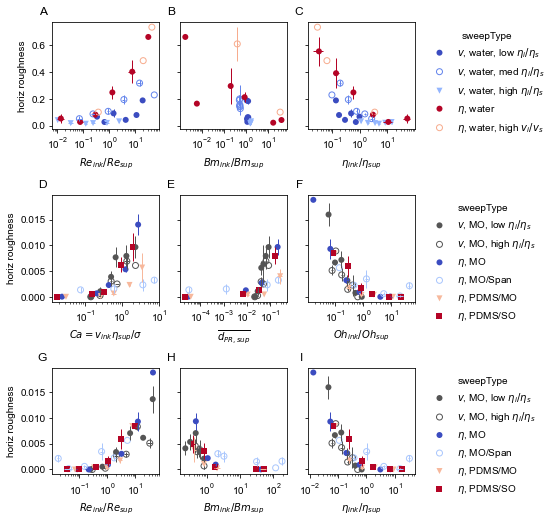

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [41]:
ss0 = ss.copy()
fig,axs = plt.subplots(3,3, figsize=(6.5, 9), sharey='row')
ss0 = me.addRatios(ss0, varlist=['Bm', 'Oh'], operator='Ratio')
ss0 = ss0[ss0.horiz_roughness_SE<0.1]
me.plainTypes(ss0)
kwargs = {'logx':True, 'logy':False, 'dx':0.2}
for i,xvar in enumerate(['ReRatio', 'BmRatio', 'viscRatio']):
    mp.sweepTypeSS(ss0[ss0.ink_type=='water'], xvar, 'horiz_roughness', ax=axs[0][i], legend=(i==2), legendloc='right', set_ylabel=(i==0), **kwargs)
for i,xvar in enumerate(['int_Ca', 'sup_dnorm', 'OhRatio']):
    mp.sweepTypeSS(ss0[(ss0.sigma>0)&(ss0.horiz_roughness_SE<0.01)], xvar, 'horiz_roughness', ax=axs[1][i], legend=(i==2), legendloc='right', set_ylabel=(i==0), **kwargs)
for i,xvar in enumerate(['ReRatio', 'BmRatio', 'viscRatio']):
    mp.sweepTypeSS(ss0[(ss0.sigma>0)&(ss0.horiz_roughness_SE<0.01)], xvar, 'horiz_roughness', ax=axs[2][i], legend=(i==2), legendloc='right', set_ylabel=(i==0), **kwargs)
for axrow in axs:
    for ax in axrow:
        mp.setSquare(ax)
mp.subFigureLabels(axs, inside=False)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'roughness_scaling.pdf'), bbox_inches='tight', dpi=300)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Cavisc', ylabel='horiz roughness'>)

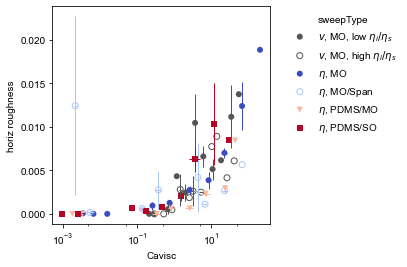

In [48]:
ss0['Cavisc'] = ss0['int_Ca']/ss0['viscRatio']
mp.sweepTypeSS(ss0[ss0.sigma>0], 'Cavisc', 'horiz_roughness', logx=True)

In [46]:
ss0[ss0.ink_type=='water'][['int_Ca', 'Cavisc']]

,int_Ca,Cavisc
0,inf,inf
1,inf,inf
4,inf,inf
6,inf,inf
7,inf,inf
...,...,...
324,inf,inf
325,inf,inf
326,inf,inf
327,inf,inf
